# Least-squares fitting

In [21]:
import numpy as np

n = 3
x = np.random.rand(n)
A = np.random.rand(n, n)
b = A.dot(x)
print(A, x, " = ", b)
A.shape

y = np.linalg.solve(A, b)

y - x

[[0.71198182 0.31235366 0.47369703]
 [0.98477954 0.70943528 0.62777568]
 [0.9931496  0.94021927 0.58690008]] [0.94740084 0.18626032 0.17758458]  =  [0.81683255 1.17660389 1.22026072]


array([-4.77395901e-15,  9.15933995e-16,  6.74460487e-15])

In [28]:
# What about an underdetermined system of equations?
m, n = 2, 10
A = np.random.rand(m, n)
x = np.random.rand(n)
b = A.dot(x)

# np.linalg.solve(A, b)  # this won't work!
y = np.linalg.lstsq(A, b, rcond=None)[0]

print(A.dot(y) - b)

print(y - x)

[ 8.88178420e-16 -1.77635684e-15]
[ 0.18740591  0.33765804 -0.01038698  0.24821234 -0.31770421  0.05479643
 -0.20623121 -0.28142313 -0.05688496 -0.02630493]


In [36]:
# What about an overdetermined system of equations?  
m, n = 10, 1
A = np.random.rand(m, n)
b = np.random.rand(m)

y = np.linalg.lstsq(A, b, rcond=None)[0]
print(y)
A.dot(y) - b

[0.6795066]


array([-0.35796731, -0.21125954, -0.27949132,  0.36990432, -0.69213722,
        0.4377687 ,  0.24631721,  0.11835182, -0.22805209,  0.16391837])

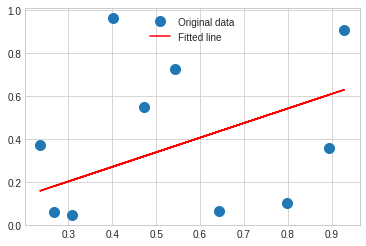

In [38]:
A
m = np.linalg.lstsq(A, b, rcond=None)[0]
m

plt.plot(A, b, 'o', label='Original data', markersize=10)
plt.plot(A, m*A, 'r', label='Fitted line')
plt.legend()
plt.show()

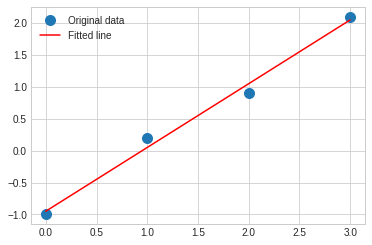

In [30]:
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

# Least-squares GDP analysis

Downloading GDP data from the World Bank with pandas.  

World bank API documentation: https://datahelpdesk.worldbank.org/knowledgebase/articles/1886695-metadata-api-queries

Example URL: http://api.worldbank.org/v2/sources/2/country/usa;jpn/series/NY.GDP.MKTP.CD?format=json


Country codes: https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes  
USA, JPN, CHN, …

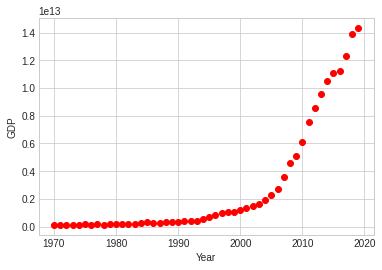

In [3]:
# Download the GDP data from the World Bank using pandas

import numpy as np
import pandas as pd

country = 'chn'
download_url = 'http://api.worldbank.org/v2/sources/2/country/' \
                 + country + '/series/NY.GDP.MKTP.CD?format=json'
data = pd.read_json(download_url)
data = data['source']['data']

years = np.array([int(term['variable'][2]['value']) for term in data])
values = np.array([float(term['value']) for term in data])


# Plot the data using matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.scatter(years, values, color='red')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

In [4]:
import numpy as np

A = np.vstack(( np.ones(len(years)), years )).transpose()
print(A.shape)

fit = np.linalg.pinv(A).dot( np.log(values) )
print(fit)

prediction = np.exp( fit.dot([1, 2030]) )
print("Prediction for 2030:", prediction)

(50, 2)
[-1.87647466e+02  1.07871187e-01]
Prediction for 2030: 40448200246701.36


In [8]:
# Can also use the "built-in" least-squares function

np.linalg.lstsq(A, np.log(values), rcond=None)[0]

array([-1.87647466e+02,  1.07871187e-01])

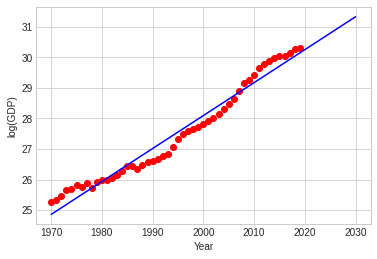

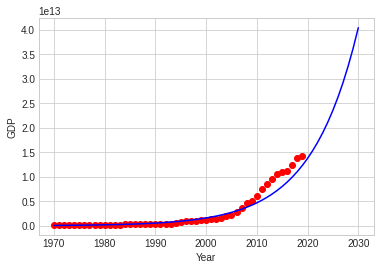

In [ ]:
pred_years = np.arange(1970, 2031)
y = np.exp( [fit.dot([1, year]) for year in pred_years] )

plt.scatter(years, np.log(values), color='red')
plt.plot(pred_years, np.log(y), color='blue')
plt.xlabel('Year')
plt.ylabel('log(GDP)')
plt.show()

plt.scatter(years, values, color='red')
plt.plot(pred_years, y, color='blue')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()